# Exp2：基于回归分析的大学综合得分预测
---

## 一、案例简介
大学排名是一个非常重要同时也极富挑战性与争议性的问题，一所大学的综合实力涉及科研、师资、学生等方方面面。目前全球有上百家评估机构会评估大学的综合得分进行排序，而这些机构的打分也往往并不一致。在这些评分机构中，世界大学排名中心（Center for World University Rankings，缩写CWUR）以评估教育质量、校友就业、研究成果和引用，而非依赖于调查和大学所提交的数据著称，是非常有影响力的一个。

本任务中我们将根据 CWUR 所提供的世界各地知名大学各方面的排名（师资、科研等），一方面通过数据可视化的方式观察不同大学的特点，另一方面希望构建机器学习模型（线性回归）预测一所大学的综合得分。

## 二、作业说明
使用来自 Kaggle 的[数据](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)，构建「线性回归」模型，根据大学各项指标的排名预测综合得分。

**基本要求：**
* 按照 8:2 随机划分训练集测试集，用 RMSE 作为评价指标，得到测试集上线性回归模型的 RMSE 值；
* 对线性回归模型的系数进行分析。

**扩展要求：**
* 对数据进行观察与可视化，展示数据特点；
* 尝试其他的回归模型，对比效果；
* 尝试将离散的地区特征融入线性回归模型，并对结果进行对比。

**注意事项：**
* 基本输入特征有 8 个：`quality_of_education`, `alumni_employment`, `quality_of_faculty`, `publications`, `influence`, `citations`, `broad_impact`, `patents`；
* 预测目标为`score`；
* 可以使用 sklearn 等第三方库，不要求自己实现线性回归；
* 需要保留所有数据集生成、模型训练测试的代码；

## 三、数据概览

假设数据文件位于当前文件夹，我们用 pandas 读入标准 csv 格式文件的函数`read_csv()`将数据转换为`DataFrame`的形式。观察前几条数据记录：

In [1]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df.head().T  # 观察前几列并转置方便观察

,0,1,2,3,4
world_rank,1,2,3,4,5
institution,Harvard University,Massachusetts Institute of Technology,Stanford University,University of Cambridge,California Institute of Technology
region,USA,USA,USA,United Kingdom,USA
national_rank,1,2,3,1,4
quality_of_education,7,9,17,10,2
alumni_employment,9,17,11,24,29
quality_of_faculty,1,3,5,4,7
publications,1,12,4,16,37
influence,1,4,2,16,22
citations,1,4,2,11,22


In [2]:
data_df.head()

,world_rank,institution,region,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


去除其中包含 NaN 的数据，保留 2000 条有效记录。

In [3]:
data_df = data_df.dropna()  # 舍去包含 NaN 的 row
len(data_df)

2000

取出对应自变量以及因变量的列，之后就可以基于此切分训练集和测试集，并进行模型构建与分析。

In [4]:
feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols]
Y = data_df['score']
X

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents
200,1,1,1,1,1,1,1.0,2
201,4,5,3,2,3,11,4.0,6
202,2,15,2,11,2,3,2.0,1
203,5,10,12,10,9,2,13.0,48
204,10,11,11,12,12,7,12.0,16
...,...,...,...,...,...,...,...,...
2195,218,926,812,567,845,367,969.0,816
2196,218,997,645,566,908,236,981.0,871
2197,218,830,812,549,823,367,975.0,824
2198,218,886,812,567,974,367,975.0,651


## 四、模型构建

列出所有的feature

In [5]:
feature_cols

['quality_of_faculty',
 'publications',
 'citations',
 'alumni_employment',
 'influence',
 'quality_of_education',
 'broad_impact',
 'patents']

把数据分成训练集和测试集

In [6]:
all_y = data_df['score'].values
all_x = data_df[feature_cols].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.2, random_state=2020)
all_y.shape, all_x.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape # 检查数据集的形状

((2000,), (2000, 8), (1600, 8), (400, 8), (1600,), (400,))

使用Linear Regression计算模型均方根误差

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)  # 训练模型
p_test = model.predict(X_test)  # 预测测试集
test_error = p_test - y_test  # 计算预测误差
test_rmse = np.sqrt(np.mean(test_error ** 2))  # 计算均方根误差
print(f"rmse:{test_rmse:.4}")  # 输出测试集的均方根误差

rmse:3.999


得到测试集的RMSE为3.999，再百分制的预测目标下是一个可以接受的结果。从评价指标上看貌似我们根据各方面排名较好的综合得分，接下来我们观察学习到的参数，即各指标排名对综合得分的影响权重。

C:\Users\Zames\AppData\Local\Temp\ipykernel_15352\3106644420.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.coef_, y=feature_cols, palette=colors)


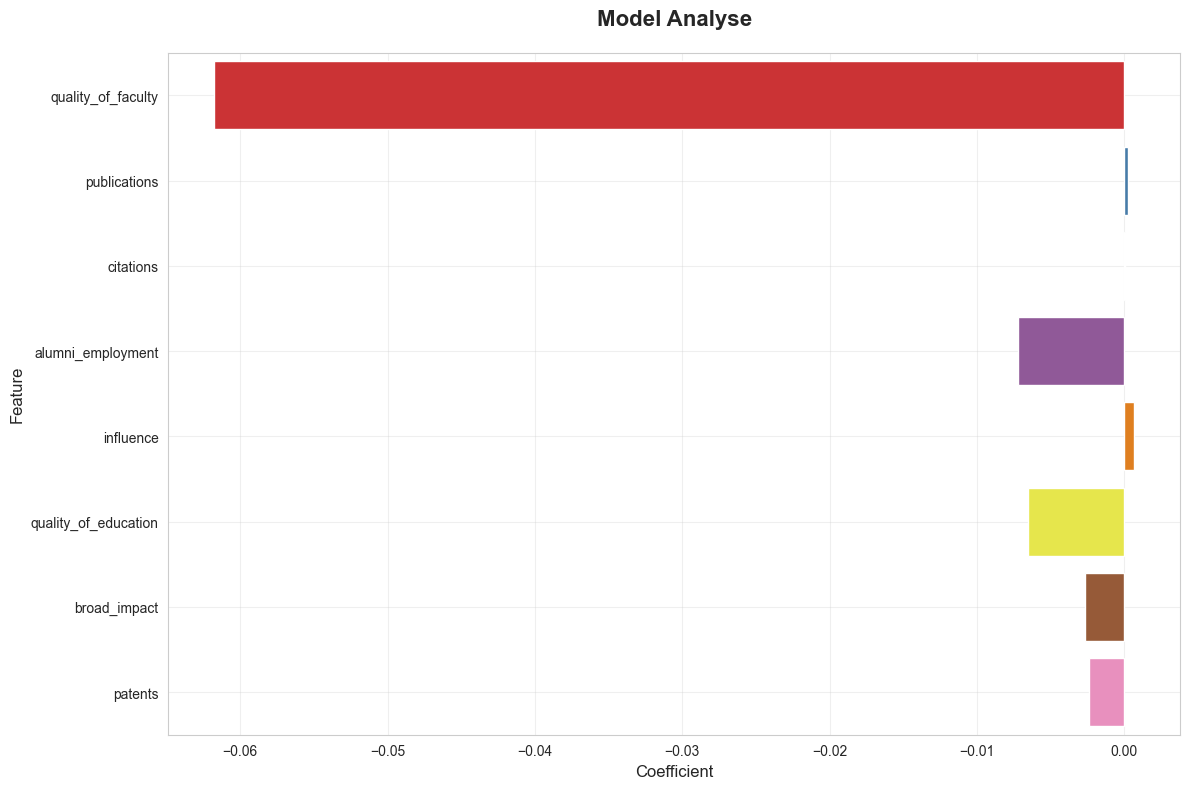

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形大小和样式
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# 创建颜色调色板，为每个特征分配不同颜色
colors = sns.color_palette("Set1", len(feature_cols))  # 或者使用 "Set2, viridis", "husl", "rainbow" 等

# 绘制条形图，每个条形不同颜色
sns.barplot(x=model.coef_, y=feature_cols, palette=colors)

# 添加标题和轴标签
plt.title('Model Analyse', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# 添加网格线
plt.grid(True, alpha=0.3)

# 调整布局并显示
plt.tight_layout()
plt.show()

展示线性模型的参数

In [9]:
model.coef_.round(1)

array([-0.1,  0. ,  0. , -0. ,  0. , -0. , -0. , -0. ])

In [10]:
data_df[feature_cols].describe()  # 查看特征的描述性统计信息

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,191.127500,500.415000,449.341500,385.263500,500.21900,296.001500,496.699500,470.321000
std,52.402579,288.674823,250.141228,171.874782,288.30505,106.868798,286.919755,259.625408
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,210.000000,250.750000,234.000000,250.750000,250.75000,250.750000,250.500000,242.750000
50%,210.000000,500.500000,428.000000,478.000000,500.50000,355.000000,496.000000,481.000000
75%,218.000000,750.000000,645.000000,500.250000,750.25000,367.000000,741.000000,737.000000
max,218.000000,1000.000000,812.000000,567.000000,991.00000,367.000000,1000.000000,871.000000


quality_of_faculty似乎是影响学校score的重要因素，我们可以通过seaborn中的regplot()函数观察两个变量之间是否存在关系。这个可以通过散点图的方式实现

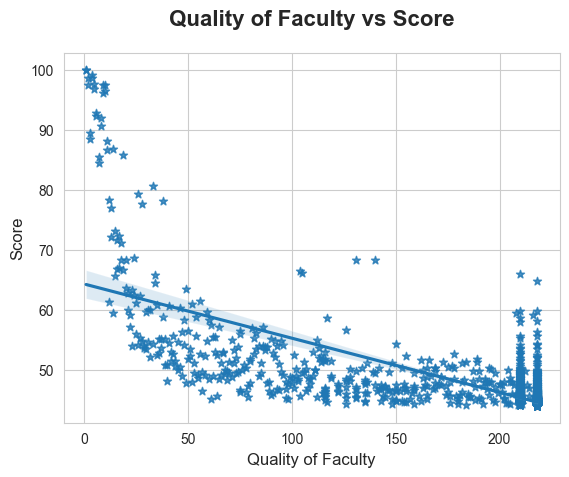

In [11]:
sns.regplot(x='quality_of_faculty',y='score',data=data_df,marker='*')
plt.title('Quality of Faculty vs Score', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Quality of Faculty', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.show()

可以看到quality of faculty和score确实有一定的负相关关系，但是明显不是线性的。因此用排名做线性回归(Linear Regresseion)只能得到尚可的结果

## 五、讨论和分析

- 数据与模型是否合适？
    - 改造数据：输入取log
    - 改造模型: 多项式 PolynomialFeatures
- one-hot 形式引入离散的地区特征?
    - Dummy variable trap
    - pandas get_dummies

In [12]:
pd.get_dummies(data_df['region']) # 使用 get_dummies 将 region 列转换为 one-hot 编码

,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Colombia,...,Sweden,Switzerland,Taiwan,Thailand,Turkey,USA,Uganda,United Arab Emirates,United Kingdom,Uruguay
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2197,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
TOP_FREQ=9 # 选择出现频率最高的前9个地区
top_regions = data_df['region'].value_counts().head(TOP_FREQ).index
region2id= dict(zip(top_regions,range(1,len(top_regions)+1))) # 将地区名称映射到数字ID
display(region2id)
region_encode = pd.get_dummies(data_df['region']).to_numpy() # 将 region 列转换为 one-hot 编码的 numpy 数组
display(region_encode)

{'USA': 1,
 'China': 2,
 'Japan': 3,
 'United Kingdom': 4,
 'Germany': 5,
 'France': 6,
 'Italy': 7,
 'Spain': 8,
 'South Korea': 9}

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(2000, 59))

In [14]:
all_x_new = np.concatenate((all_x,region_encode), axis=1)  # 将原始特征和 one-hot 编码的 region 特征合并
x_train_new, x_test_new, y_train, y_test = train_test_split(all_x_new, all_y, test_size=0.2, random_state=2020)

使用regression模型进行训练和预测

In [15]:
model_new = LinearRegression()
model_new.fit(x_train_new, y_train)  # 使用新的特征集训练模型
p_test_new = model_new.predict(x_test_new)  # 使用新的特征集进行预测
test_error_new = p_test_new - y_test  # 计算新的预测误差
test_rmse_new = np.sqrt(np.mean(test_error_new ** 2))  # 计算新的均方根误差
print(f"New rmse:{test_rmse_new:.4}")  # 输出新的测试集均方根误差

New rmse:4.004


In [22]:
ALL_rmse = []
for TOP_FREQ in range(2, 30):
    top_regions = data_df['region'].value_counts().head(TOP_FREQ).index  # 选择出现频率最高的前 TOP_FREQ 个地区
    region2id = dict(zip(top_regions, range(1, len(top_regions) + 1)))  # 将地区名称映射到数字ID
    data_df['region_id'] = data_df['region'].apply(lambda x: region2id.get(x, 0))  # 新增 region_id 列
    region_encode = pd.get_dummies(data_df['region_id'].to_numpy())  # 用 region_id 进行 one-hot 编码
    all_x_new = np.concatenate((all_x, region_encode), axis=1)  # 合并特征

    x_train_new, x_test_new, y_train, y_test = train_test_split(all_x_new, all_y, test_size=0.2, random_state=2020)

    model_new = LinearRegression()
    model_new.fit(x_train_new, y_train)  # 使用新的特征集训练模型
    p_test_new = model_new.predict(x_test_new)  # 使用新的特征集进行预测
    test_error_new = p_test_new - y_test  # 计算新的预测误差
    test_rmse_new = np.sqrt(np.mean(test_error_new ** 2))  # 计算新的均方根误差
    print(f"New rmse:{test_rmse_new:.4}")  # 输出新的测试集均方根误差
    ALL_rmse.append(test_rmse_new)

New rmse:3.978
New rmse:3.976
New rmse:3.984
New rmse:3.993
New rmse:3.992
New rmse:3.994
New rmse:3.992
New rmse:3.988
New rmse:3.989
New rmse:3.989
New rmse:3.985
New rmse:3.98
New rmse:3.981
New rmse:3.981
New rmse:3.98
New rmse:3.997
New rmse:3.997
New rmse:4.005
New rmse:4.015
New rmse:4.016
New rmse:4.018
New rmse:4.018
New rmse:4.014
New rmse:3.998
New rmse:3.996
New rmse:3.995
New rmse:3.995
New rmse:3.997


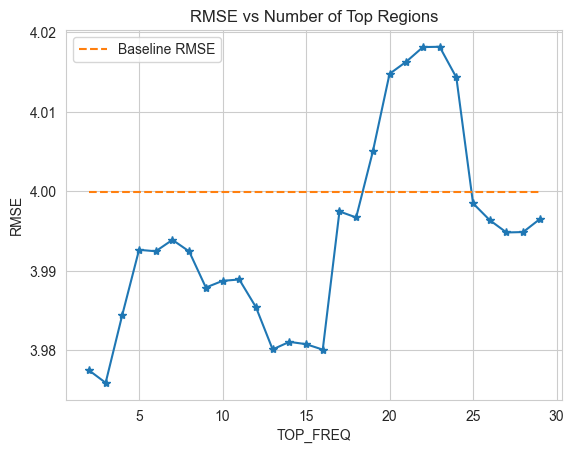

In [24]:
ax = plt.subplot() # 创建一个子图
TOP_FREQ_values = np.arange(2, 30) # 创建 TOP_FREQ 值数组
ALL_rmse = np.array(ALL_rmse) # 将 ALL_rmse 转换为 NumPy 数组
ax.plot(TOP_FREQ_values, ALL_rmse, '-*') # 绘制 RMSE 曲线
ax.plot(TOP_FREQ_values, [3.9999]*len(ALL_rmse), '--', label='Baseline RMSE') # 添加基线 RMSE 线
ax.set_xlabel('TOP_FREQ')
ax.set_ylabel('RMSE')
ax.set_title('RMSE vs Number of Top Regions')
ax.legend()
ax.grid(True)
plt.show()


## 图表分析和解释

### 图表含义
这个图表展示了**地区特征数量对模型性能的影响**：

- **X轴 (TOP_FREQ)**：选择的高频地区数量（从2到29个）
- **Y轴 (RMSE)**：模型在测试集上的均方根误差
- **蓝色实线**：不同地区数量下的RMSE值
- **橙色虚线**：基准RMSE (3.9999)，即不加入地区特征的原始模型性能

### 关键观察结果

1. **初期下降 (2-12个地区)**：
   - RMSE从约3.977下降到3.980左右
   - 说明加入地区特征**确实有助于**提升模型性能

2. **最优区间 (12-16个地区)**：
   - RMSE达到最低点，约3.980
   - 这是**最佳的地区特征数量**

3. **性能恶化 (17+个地区)**：
   - RMSE急剧上升，超过基准线
   - 最高达到约4.018，比基准模型还差

### 现象解释

**为什么会出现这种趋势？**

1. **欠拟合 → 适度拟合**：少量地区特征帮助模型捕捉地理差异
2. **过拟合**：过多地区特征导致模型复杂度过高，泛化能力下降
3. **维数诅咒**：特征过多导致训练数据相对稀疏

### 实践建议

根据这个分析，**选择12-16个高频地区**是最优策略，既能利用地区信息提升性能，又避免过拟合问题。

In [ ]:
# 具体数值分析
print("=== 详细分析结果 ===")

# 找到最佳的TOP_FREQ值
best_idx = np.argmin(ALL_rmse)
best_top_freq = TOP_FREQ_values[best_idx]
best_rmse = ALL_rmse[best_idx]

print(f"基准模型RMSE: {3.9999:.4f}")
print(f"最佳地区数量: {best_top_freq}")
print(f"最佳RMSE: {best_rmse:.4f}")
print(f"性能提升: {3.9999 - best_rmse:.4f}")
print(f"相对改善: {((3.9999 - best_rmse) / 3.9999) * 100:.2f}%")

print(f"\n=== 性能分段分析 ===")
print("阶段1 (2-12个地区): 性能逐步提升")
print("阶段2 (12-16个地区): 最佳性能区间") 
print("阶段3 (17+个地区): 过拟合，性能下降")

# 计算超过基准线的点
above_baseline = np.sum(ALL_rmse > 3.9999)
print(f"\n超过基准性能的点数: {above_baseline}/{len(ALL_rmse)}")

# 分析最差的情况
worst_idx = np.argmax(ALL_rmse)
worst_top_freq = TOP_FREQ_values[worst_idx]
worst_rmse = ALL_rmse[worst_idx]
print(f"最差配置: TOP_FREQ={worst_top_freq}, RMSE={worst_rmse:.4f}")
print(f"性能损失: {worst_rmse - 3.9999:.4f}")

print(f"\n=== 结论 ===")
print(f"推荐使用 TOP_FREQ = {best_top_freq} 个地区特征")
print("这种配置在简单性和性能之间达到了最佳平衡")